In [1]:
import pandas as pd
import polars as pl
import numpy as np
import sys

sys.path.append(r"..\..")
sys.path.append(r"..")

import scipy.stats as stats
import statsmodels.stats as sms
import statsmodels.stats.outliers_influence as oi
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from importlib import reload

# from PredicTables.src import correlation_matrix as cm
# import PredicTables.src.correlation_matrix as cm

# from PredicTables.src.variance_inflation_factor import _vif
# from PredicTables.src.eigenvalue_analysis import _eigenvalues

In [ ]:
import requests
import json

dat = {"req": "HI THERE"}

dat = json.dumps(dat)

In [2]:
from scipy.stats import norm


def a():
    # Create random variables with random seed=42
    rvs = pd.Series(norm.rvs(size=3, random_state=42))
    return pd.Series([1, 2, 3]) * rvs


def b():
    # Create random variables with random seed=42
    rvs = pd.Series(norm.rvs(size=3, random_state=421))
    return pd.Series([4, 5, 6]) * rvs


def c():
    # Create random variables with random seed=42
    rvs = pd.Series(norm.rvs(size=3, random_state=422))
    return pd.Series([7, 8, 9]) * rvs


# cm = reload(cm)
import numpy as np

np.random.seed(42)
data = np.random.normal(size=(1000, 20))
df = pd.DataFrame(
    data[:, :10], columns=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
)
# x = cm._highly_correlated_variables(df, threshold=0.01)
# tuple(x['var1 var2'.split()].to_records(index=False))
# x[:5]

In [3]:
df["corrvar"] = (
    df.iloc[:, 0] * norm.rvs(size=df.shape[0], random_state=42)
) + norm.rvs(size=df.shape[0], random_state=44, loc=df.iloc[:, 0].mean())

In [4]:
filename = r"C:\Users\aweaver\OneDrive - The Cincinnati Insurance Company\Small Business\Hit Ratio Model\dat\dan3.parquet"
cols = ["prem", "account_naics", "evolve_manual_prem", "evolve_hit_count"]

df = pd.read_parquet(filename)[cols].dropna().astype(float)
df["gt_mean"] = (
    (df["prem"] > df["prem"].mean()).astype(int).astype(str).astype("category")
)

df.head()

,prem,account_naics,evolve_manual_prem,evolve_hit_count,gt_mean
0,2480.0,561730.0,2254.545455,0.0,0
1,4347.0,561730.0,4347.000000,0.0,1
2,4563.0,561730.0,3802.500000,0.0,1
3,1946.0,523930.0,1496.923077,0.0,0
4,800.0,523930.0,800.000000,0.0,0


In [5]:
# cm._correlation_matrix(df).where(np.tril(np.ones(cm._correlation_matrix(df).shape), k=-1).astype(bool)).unstack().dropna()

In [6]:
# ldf.select('gt_mean').unique().collect().shape[0]

In [7]:
df["col1"] = df["prem"] + norm.rvs(size=df.shape[0], random_state=42)
df["bin1"] = (df["prem"] > df["prem"].mean()).astype(int).astype(str).astype("category")
df["bin2"] = (
    (df["prem"] > df["prem"].median()).astype(int).astype(str).astype("category")
)

In [8]:
ldf = pl.from_pandas(df).lazy()
ldf.head().collect()

prem,account_naics,evolve_manual_prem,evolve_hit_count,gt_mean,col1,bin1,bin2
f64,f64,f64,f64,cat,f64,cat,cat
2480.0,561730.0,2254.545455,0.0,"""0""",2480.496714,"""0""","""1"""
4347.0,561730.0,4347.0,0.0,"""1""",4346.861736,"""1""","""1"""
4563.0,561730.0,3802.5,0.0,"""1""",4563.647689,"""1""","""1"""
1946.0,523930.0,1496.923077,0.0,"""0""",1947.52303,"""0""","""1"""
800.0,523930.0,800.0,0.0,"""0""",799.765847,"""0""","""0"""


In [9]:
binary = (
    ldf.select("bin1 bin2 gt_mean evolve_hit_count".split())
    .cast(pl.Int8)
    .cast(pl.Utf8)
    .cast(pl.Categorical)
)
continuous = ldf.select("prem evolve_manual_prem col1".split())
binary.unique().collect()

bin1,bin2,gt_mean,evolve_hit_count
cat,cat,cat,cat
"""0""","""1""","""0""","""0"""
"""1""","""1""","""1""","""1"""
"""1""","""1""","""1""","""0"""
"""0""","""0""","""0""","""1"""
"""0""","""0""","""0""","""0"""
"""0""","""1""","""0""","""1"""


In [10]:
continuous.head().collect()

prem,evolve_manual_prem,col1
f64,f64,f64
2480.0,2254.545455,2480.496714
4347.0,4347.0,4346.861736
4563.0,3802.5,4563.647689
1946.0,1496.923077,1947.52303
800.0,800.0,799.765847


In [19]:
# create a table of sums of the continuous variables for each level of the binary variables

binary = (
    ldf.select("bin1 bin2 gt_mean evolve_hit_count".split())
    .cast(pl.Int8)
    .cast(pl.Utf8)
    .cast(pl.Categorical)
)
continuous = ldf.select("prem evolve_manual_prem col1".split())

# Get the sum of each continuous variable for each level of each binary variable
sum_bin1 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "1").sum().collect()
        for b in binary.columns
    ]
).lazy()
sum_bin0 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "0").sum().collect()
        for b in binary.columns
    ]
).lazy()

# Get the number of observations for each level of each binary variable
count_bin1 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "1")
        .with_columns([pl.lit(1).alias(c) for c in continuous.columns])
        .sum()
        .collect()
        for b in binary.columns
    ]
).lazy()
count_bin0 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "0")
        .with_columns([pl.lit(1).alias(c) for c in continuous.columns])
        .sum()
        .collect()
        for b in binary.columns
    ]
).lazy()

# Get the number of observations for each continuous variable for all levels of the binary variables
count_bin = pl.concat(
    [
        ldf.with_columns([pl.lit(1).alias(c) for c in continuous.columns])
        .sum()
        .collect()
        for b in binary.columns
    ]
).lazy()

# Get the mean of each continuous variable for each level of each binary variable
mean_bin1 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "1").mean().collect()
        for b in binary.columns
    ]
).lazy()
mean_bin0 = pl.concat(
    [
        ldf.filter(pl.col(b).cast(pl.Int8).cast(pl.Utf8) == "0").mean().collect()
        for b in binary.columns
    ]
).lazy()

# Get the mean of each continuous variable for all levels of the binary variables
mean_bin = pl.concat([ldf.mean().collect() for b in binary.columns]).lazy()

# Calculate the standard deviation of each continuous variable for all levels of the binary variables
# Uses `with_context` to pass the mean and count tables to the standard deviation table
sd = continuous.with_context(
    [
        mean_bin.select(pl.all().suffix("_mean")),
        count_bin.select(pl.all().suffix("_count")),
    ]
).select(
    [
        (
            (pl.col(c) - pl.col(f"{c}_mean").first()).pow(2).sum()
            / (pl.col(f"{c}_count").first() - 1)
        )
        .sqrt()
        .alias(c)
        for c in continuous.columns
    ]
)

# Calculate the bias correction factor for each continuous variable for all levels of the binary variables
bias_correction = count_bin.with_context(
    [count_bin1.select(pl.all().suffix("1")), count_bin0.select(pl.all().suffix("0"))]
).select(
    [
        (pl.col(c + "1") * pl.col(c + "0") / (pl.col(c) * (pl.col(c) - 1)))
        .sqrt()
        .alias(c)
        for c in continuous.columns
    ]
)

# Calculate the point biserial correlation for each continuous variable for all levels of the binary variables, then
# melt the table to get a row for each (binary, continuous) pair, and sort by the absolute value of the correlation
# coefficient so the most correlated features are at the top
r_pb = (
    mean_bin1.select(pl.all().suffix("_mean1"))
    .with_context(
        [
            mean_bin0.select(pl.all().suffix("_mean0")),
            sd.select(pl.all().suffix("_sd")),
            bias_correction.select(pl.all().suffix("_bias_correction")),
        ]
    )
    .select(
        [
            (
                ((pl.col(c + "_mean1") - pl.col(c + "_mean0")) / pl.col(c + "_sd"))
                * pl.col(c + "_bias_correction")
            ).alias(c)
            for c in continuous.columns
        ]
    )
    .with_columns(pl.Series(binary.columns).alias("feature1"))
    .melt(id_vars="feature1", variable_name="feature2", value_name="r")
    .with_columns(pl.col("r").abs().alias("|r|"))
    .sort(["|r|", "feature1", "feature2"])
)

r_pb.collect()

feature1,feature2,r,|r|
str,str,f64,f64
"""evolve_hit_cou…","""evolve_manual_…",-0.0256,0.0256
"""evolve_hit_cou…","""col1""",-0.026687,0.026687
"""evolve_hit_cou…","""prem""",-0.026687,0.026687
"""bin2""","""col1""",0.115,0.115
"""bin2""","""prem""",0.115,0.115
"""bin2""","""evolve_manual_…",0.124289,0.124289
"""bin1""","""col1""",0.158539,0.158539
"""gt_mean""","""col1""",0.158539,0.158539
"""bin1""","""prem""",0.158539,0.158539


In [13]:
count_bin.collect()

prem,account_naics,evolve_manual_prem,evolve_hit_count,gt_mean,col1,bin1,bin2
i32,f64,i32,f64,cat,i32,cat,cat
14669,8.5925e9,14669,5519.0,null,14669,null,null
14669,8.5925e9,14669,5519.0,null,14669,null,null
14669,8.5925e9,14669,5519.0,null,14669,null,null
14669,8.5925e9,14669,5519.0,null,14669,null,null


In [14]:
ldf.select(["evolve_manual_prem", "bin1"]).filter(
    pl.col("bin1").eq("1")
).sum().collect()["evolve_manual_prem"].item()

30467867.005497254

In [15]:
b = df.bin1.astype(np.float64).values.reshape(-1, 1)
c = df.prem.astype(np.float64).values.reshape(-1, 1)
b.shape, c.shape

((14669, 1), (14669, 1))

In [16]:
b.dtype, c.dtype

(dtype('float64'), dtype('float64'))

In [17]:
# reload(cm)

cm._point_biserial_correlation_matrix(df)

NameError: name 'cm' is not defined

In [ ]:
cm._correlation_matrix_plot(df);

AttributeError: module 'PredicTables.src.correlation_matrix' has no attribute '_correlation_matrix_plot'

In [ ]:
cm = reload(cm)
cm._highly_correlated_variables(df, threshold=0.7)

[('prem', 'evolve_manual_prem'),
 ('prem', 'corrvar'),
 ('evolve_manual_prem', 'corrvar')]

In [ ]:
_eigenvalues(df, round_to=2)

,feature,eigenvalue,log[condition_number]
0,a,0.82,0.35
1,d,0.88,0.28
2,e,0.89,0.27
3,f,0.93,0.23
4,corrvar,0.99,0.17
5,j,1.02,0.14
6,i,1.03,0.13
7,h,1.04,0.12
8,g,1.08,0.08
9,c,1.15,0.02


In [ ]:
cm = reload(cm)
import numpy as np

np.random.seed(42)
data = np.random.normal(size=(1000, 20))
df = pd.DataFrame(
    data[:, :10], columns=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
)
# x = cm._highly_correlated_variables(df, threshold=0.01)
# tuple(x['var1 var2'.split()].to_records(index=False))
# x

In [ ]:
filename = r"C:\Users\aweaver\OneDrive - The Cincinnati Insurance Company\Small Business\Hit Ratio Model\dat\dan3.parquet"
cols = ["prem", "account_naics", "evolve_manual_prem", "evolve_hit_count"]

df = pd.read_parquet(filename)[cols].dropna().astype(float)
df.head()

,prem,account_naics,evolve_manual_prem,evolve_hit_count
0,2480.0,561730.0,2254.545455,0.0
1,4347.0,561730.0,4347.000000,0.0
2,4563.0,561730.0,3802.500000,0.0
3,1946.0,523930.0,1496.923077,0.0
4,800.0,523930.0,800.000000,0.0


In [ ]:
cm._correlation_matrix(df)

,prem,account_naics,evolve_manual_prem,evolve_hit_count
prem,1.000000,0.004578,0.998906,-0.026687
account_naics,0.004578,1.000000,0.003449,-0.003700
evolve_manual_prem,0.998906,0.003449,1.000000,-0.025600
evolve_hit_count,-0.026687,-0.003700,-0.025600,1.000000


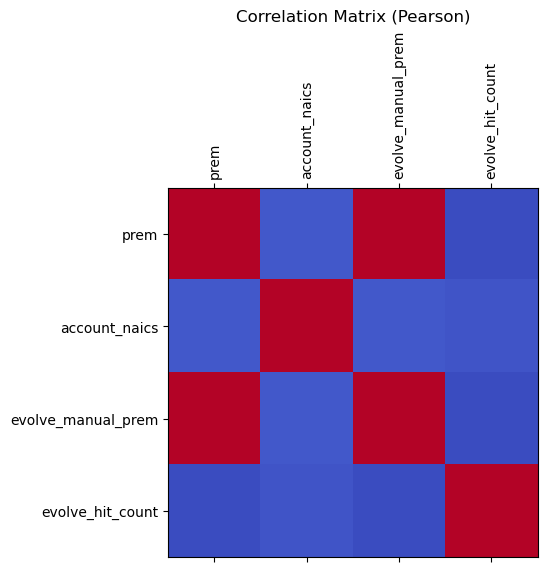

In [ ]:
cm._correlation_matrix_plot(df);